## Project 2: Wrangle WeRateDogs Twitter Data

#### Data Sets
<ul>
    <li>Enhanced Twitter Archive</li>
    <li>Additional Data via the Twitter API</li>
    <li>Image Predictions File</li>
</ul>

In [2]:
import requests
import os
import json
from timeit import default_timer as timer
from functools import reduce

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tweepy


### Step 1: Gathering Data

In [3]:
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

#### Using requests library to download image predictions data

In [5]:
folder_name = 'image_resdictions'

if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)
    
os.listdir(folder_name)    

['image-predictions.tsv']

#### Creating a DataFrame with the downloaded image predictions data

In [6]:
df_image_predictions = pd.read_csv('image_resdictions/image-predictions.tsv', sep='\t')

### Downloading Additional Data via Twitter API using Tweepy

In [ ]:
consumer_key = '****'
consumer_secret = '****'
access_token = '****'
access_secret = '****'

auth = tweepy.OAuth1UserHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# get twitter ids from the twitter archive dataframe above
tweet_ids = df_twitter_archive.tweet_id.values

# Query Twiter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

# Save each tweets returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(f'{str(count)} : {str(tweet_id)}')
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print('Success')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            print('Fail')
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

#### Reading tweet_json.txt into a Pandas DataFrame

In [7]:

with open('tweet_json.txt') as file:
    status = []
    for line in file:
        status.append(json.loads(line))
        
df_additional_data = pd.DataFrame(status, columns=['id', 'retweet_count', 'favorite_count'])


### Step 2: Assessing the Data

#### Visual Assessment

In [8]:
# Visual assessment of twitter_archive dataframe
df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [9]:
# Visual assessment of image_predictions dataframe
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [10]:
# Visual assessment of additional_data dataframe
df_additional_data

,id,retweet_count,favorite_count
0,892420643555336193,6961,33644
1,892177421306343426,5266,29206
2,891815181378084864,3463,21956
3,891689557279858688,7187,36757
4,891327558926688256,7708,35113
...,...,...,...
2322,666049248165822465,36,88
2323,666044226329800704,114,246
2324,666033412701032449,36,100
2325,666029285002620928,39,112


#### Programmatic Assessment

In [11]:
# reading the second text in the text column of twitter_archive data
df_twitter_archive['text'][1]

"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"

In [12]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
# find missing values in every column
df_twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

<strong>Find the number of replies and retweets in the data</strong>

In [14]:
replies = sum(~df_twitter_archive.in_reply_to_status_id.isnull())
retweets = sum(~df_twitter_archive.retweeted_status_id.isnull())

print(f'Replies: {replies}')
print(f'Retweets: {retweets}')

Replies: 78
Retweets: 181


In [15]:
# names analysis
df_twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [16]:
# Some names are in lower case: How many are they? what is the count of each?
lowercase_names = df_twitter_archive.name.str.islower().value_counts()
lowercase_names_distro = df_twitter_archive[df_twitter_archive.name.str.islower()].name.value_counts()

In [17]:
lowercase_names

False    2247
True      109
Name: name, dtype: int64

In [18]:
lowercase_names_distro

a               55
the              8
an               7
very             5
just             4
quite            4
one              4
getting          2
actually         2
mad              2
not              2
old              1
life             1
officially       1
light            1
by               1
infuriating      1
such             1
all              1
unacceptable     1
this             1
his              1
my               1
incredibly       1
space            1
Name: name, dtype: int64

<strong>Dog stages analysis<strong>

In [19]:
# What is the count of each dog stage?
print(df_twitter_archive.doggo.value_counts())
print(df_twitter_archive.puppo.value_counts())
print(df_twitter_archive.floofer.value_counts())
print(df_twitter_archive.pupper.value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64


<strong>Tweet source analysis</strong>

In [20]:
# What is the source of the tweets?
df_twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [21]:
df_twitter_archive['source'].duplicated().sum()

2352

In [22]:
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [23]:
# Check the number of non dog image predictions

df_image_predictions.query('p1_dog == False and p2_dog == False and p3_dog == False').count()

tweet_id    324
jpg_url     324
img_num     324
p1          324
p1_conf     324
p1_dog      324
p2          324
p2_conf     324
p2_dog      324
p3          324
p3_conf     324
p3_dog      324
dtype: int64

In [24]:

# check for tweets that do not have images, and corresponding image predictions
sum(~df_twitter_archive.tweet_id.isin(df_image_predictions.tweet_id))


281

In [25]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
df_image_predictions.tweet_id.duplicated().sum()

0

In [27]:
df_additional_data.sample(3)

,id,retweet_count,favorite_count
1947,672995267319328768,251,842
1629,683142553609318400,929,2640
923,751950017322246144,829,2841


In [28]:
df_additional_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


#### <strong>Assessment Findings</strong>

##### Tidiness Issues
<ul>
    <li>The data is spread across different tables</li>
    <li>Timestamp column has two variables:date and time</li>
    <li>rating_numerator and rating_denominator columns should be combined to a rating column</li>
    <li>doggo, floofer,pupper,puppo which are dog stages are in different columns</li>
</ul>

##### Quality Issues
<ul>
    <li>Many columns have missing data: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp</li>
    <li>Retweets and replies in the tweets archive table</li>
    <li>Some rows have both p1_dog, p2_dog and p3_dog columns as False. Meaning the image predictions are not god breeds</li>
    <li>Some breed names are in lowercase</li>
    <li>Source column contains rel tag and link text(HTML Tags)</li>
    <li>Checking pup on you instead of checking up on you in the second text in the text column</li>
</ul>


### Step 3: Cleaning Data
Remmedies to Quality and Tidiness


In [29]:
# Make a copy of the data

clean_df_additional_data = df_additional_data.copy()
clean_df_image_predictions = df_image_predictions.copy()
clean_df_twitter_archive = df_twitter_archive.copy()

#### Cleaning Tidiness Issues

#### <strong>The data is spread across different tables.</strong>
<strong>Define:</strong>
Merge all the dataframes into a single table.

<strong>Code</strong>

In [30]:
archive_prediction = pd.merge(clean_df_twitter_archive, clean_df_image_predictions, how='inner', on='tweet_id')

In [31]:
clean_df_additional_data = clean_df_additional_data.rename(columns={'id': 'tweet_id'})

In [32]:
clean_df_twitter = pd.merge(archive_prediction, clean_df_additional_data, how='inner', on='tweet_id')


<strong>Test</strong>

In [33]:
clean_df_twitter.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,6961,33644
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5266,29206
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3463,21956


#### <strong>Timestamp column has two variables:date and time</strong>
<strong>Define:</strong>
Extract date and time from the timestamp column using regular expressions and pandas' str.extract method, then drop the timestamp column.

<strong>Code</strong>

In [34]:
clean_df_twitter['timestamp'] = pd.to_datetime(clean_df_twitter['timestamp'])

clean_df_twitter['date'] = clean_df_twitter.timestamp.dt.date

clean_df_twitter['time'] = clean_df_twitter.timestamp.dt.time

# drop the timestamp column

clean_df_twitter = clean_df_twitter.drop('timestamp', axis=1)

<strong>Test</strong>

In [35]:
clean_df_twitter.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,date,time
793,749064354620928000,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Meet Winston. He's pupset because I forgot to ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749064354...,11,...,Brabancon_griffon,0.003314,True,Pekinese,0.002989,True,1400,4485,2016-07-02,02:17:13
147,857029823797047296,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Zeke. He performs group cheeky wink tu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/857029823...,12,...,Labrador_retriever,0.010325,True,Saluki,0.004148,True,3470,16996,2017-04-26,00:33:27
619,775364825476165632,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Finley. He's an independent doggo stil...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/775364825...,11,...,Chihuahua,0.175257,True,Pembroke,0.034306,True,2700,6918,2016-09-12,16:05:54


#### <strong>rating_numerator and rating_denominator columns should be combined to a rating column<strong>
<strong>Define:</strong>
Put the rating numerator value over the rating denominator value under a rating column then drop the rating_numerator and rating_denominator columns    
    
<strong>Code</strong>

In [36]:
clean_df_twitter['rating'] = clean_df_twitter[['rating_numerator', 'rating_denominator']].apply(lambda row: '/'.join(row.values.astype(str)), axis=1)

# drop the rating_numerator and rating_denominator columns
clean_df_twitter = clean_df_twitter.drop(columns=['rating_numerator', 'rating_denominator'])


<strong>Test</strong>

In [37]:
clean_df_twitter.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,date,time,rating
1621,674394782723014656,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Gary. He's a hide and seek champion. S...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674394782...,Gary,...,0.133247,False,Lakeland_terrier,0.109099,True,487,1333,2015-12-09,01:07:00,8/10
1084,706681918348251136,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Katie. She's a Mitsubishi Hufflep...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706681918...,Katie,...,0.151433,True,Norwich_terrier,0.047087,True,888,3018,2016-03-07,03:24:33,12/10
434,805207613751304193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Shooter. He's doing quite the snowy zo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/805207613...,Shooter,...,0.180461,True,Cardigan,0.094664,True,1620,7442,2016-12-04,00:30:29,12/10
1828,670385711116361728,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Meet Larry. He's a Panoramic Benzoate. Can sho...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670385711...,Larry,...,0.105969,True,beagle,0.078720,True,172,488,2015-11-27,23:36:23,8/10
2012,666781792255496192,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Bacardi named Octaviath. Ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666781792...,a,...,0.151363,True,vizsla,0.085989,True,168,324,2015-11-18,00:55:42,10/10


#### <strong>doggo, floofer,pupper,puppo which are dog stages are in different columns<strong>
<strong>Define:</strong>
Melt doggo, floofer, pupper and puppo columns into dog_stage column
    
<strong>Code</strong>

In [38]:
# Replace all 'None' with empty string
clean_df_twitter.doggo.replace('None', '', inplace = True)
clean_df_twitter.floofer.replace('None', '', inplace = True)
clean_df_twitter.pupper.replace('None', '', inplace = True)
clean_df_twitter.puppo.replace('None', '', inplace = True)

# Merge the dog_stages into one column
clean_df_twitter['dog_stage'] = (clean_df_twitter['doggo'] + clean_df_twitter['floofer'] 
                                + clean_df_twitter['pupper'] + clean_df_twitter['puppo'])
# Fix rows with multiple dog stages
clean_df_twitter.loc[clean_df_twitter.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
clean_df_twitter.loc[clean_df_twitter.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
clean_df_twitter.loc[clean_df_twitter.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'


In [39]:
# fix missing values 
clean_df_twitter.loc[clean_df_twitter.dog_stage == '', 'dog_stage'] = np.nan

# Drop the other dog stages columns
clean_df_twitter.drop(['doggo', 'pupper', 'puppo', 'floofer'], axis=1, inplace = True)

# convert dog_stage column datatype from string to category 
clean_df_twitter.dog_stage = clean_df_twitter.dog_stage.astype('category')

<strong>Test</strong>

In [40]:
clean_df_twitter.dog_stage.value_counts()

pupper            210
doggo              65
puppo              23
doggo, pupper      11
floofer             7
doggo, floofer      1
doggo, puppo        1
Name: dog_stage, dtype: int64

#### Cleaning Quality Issues

#### <strong>Many columns have missing data: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp<strong>

<strong>Define:</strong>
Drop columns with all missing values in the twitter archive table

<strong>Code</strong>

In [41]:
clean_df_twitter = clean_df_twitter.drop(['in_reply_to_status_id', 
                                                          'in_reply_to_user_id',
                                                          'retweeted_status_id',
                                                          'retweeted_status_user_id',
                                                          'retweeted_status_timestamp'],
                                                           axis=1)
                                                          

#### Test

In [42]:
clean_df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   tweet_id        2057 non-null   int64   
 1   source          2057 non-null   object  
 2   text            2057 non-null   object  
 3   expanded_urls   2057 non-null   object  
 4   name            2057 non-null   object  
 5   jpg_url         2057 non-null   object  
 6   img_num         2057 non-null   int64   
 7   p1              2057 non-null   object  
 8   p1_conf         2057 non-null   float64 
 9   p1_dog          2057 non-null   bool    
 10  p2              2057 non-null   object  
 11  p2_conf         2057 non-null   float64 
 12  p2_dog          2057 non-null   bool    
 13  p3              2057 non-null   object  
 14  p3_conf         2057 non-null   float64 
 15  p3_dog          2057 non-null   bool    
 16  retweet_count   2057 non-null   int64   
 17  favorite_count

#### <strong>retweets and replies in the tweets archive table</strong>
<strong>Define:</strong>
Remove retweets and replies using isnull method so as to rmain only with rows containing original tweets

Droping the missing data columns subsequently removes replies and retweets from the dataframe

<strong>Test</strong>

In [43]:
clean_df_twitter.head(2)

,tweet_id,source,text,expanded_urls,name,jpg_url,img_num,p1,p1_conf,p1_dog,...,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,date,time,rating,dog_stage
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,...,False,banana,0.076110,False,6961,33644,2017-08-01,16:23:56,13/10,NaN
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,...,True,papillon,0.068957,True,5266,29206,2017-08-01,00:17:27,13/10,NaN


#### <strong>Some rows have both p1_dog, p2_dog and p3_dog columns as False. Meaning the image predictions are not god breeds</strong>

<strong>Define:</strong>
Keep only rows where both p1_dog, p2_dog and p3_dog is True

<strong>Code</strong>


In [44]:
clean_df_twitter = clean_df_twitter.query('(p1_dog == True) or (p2_dog == True) or (p3_dog == True)')


<strong>Test</strong>

In [45]:
clean_df_twitter.loc[(clean_df_twitter['p1_dog'] == False) & 
                     (clean_df_twitter['p2_dog'] == False) & 
                     (clean_df_twitter['p3_dog'] == False)].any()

/tmp/ipykernel_285808/2410423393.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'bool_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  clean_df_twitter.loc[(clean_df_twitter['p1_dog'] == False) &


tweet_id          False
source            False
text              False
expanded_urls     False
name              False
jpg_url           False
img_num           False
p1                False
p1_conf           False
p1_dog            False
p2                False
p2_conf           False
p2_dog            False
p3                False
p3_conf           False
p3_dog            False
retweet_count     False
favorite_count    False
date              False
time              False
rating            False
dtype: bool

#### <strong>Some breed names are in lowercase</strong>
<strong>Define:</strong>
Capitalize the first letter of the breeds using str.capitalize() method

<strong>Code</strong>

In [46]:
clean_df_twitter['p1'] = clean_df_twitter['p1'].str.capitalize()
clean_df_twitter['p2'] = clean_df_twitter['p2'].str.capitalize()
clean_df_twitter['p3'] = clean_df_twitter['p3'].str.capitalize()

<strong>Test</strong>

In [47]:
clean_df_twitter.head()

,tweet_id,source,text,expanded_urls,name,jpg_url,img_num,p1,p1_conf,p1_dog,...,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,date,time,rating,dog_stage
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,...,True,Papillon,0.068957,True,5266,29206,2017-08-01,00:17:27,13/10,NaN
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,...,True,Kelpie,0.031379,True,3463,21956,2017-07-31,00:18:03,12/10,NaN
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper_towel,0.170278,False,...,True,Spatula,0.040836,False,7187,36757,2017-07-30,15:58:51,13/10,NaN
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,...,True,German_short-haired_pointer,0.175219,True,7708,35113,2017-07-29,16:00:24,12/10,NaN
5,891087950875897856,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_bay_retriever,0.425595,True,...,True,Indian_elephant,0.076902,False,2580,17714,2017-07-29,00:08:17,13/10,NaN


#### <strong>source column contains rel tag and link text(HTML Tags)</strong>
<strong>Define:</strong>
Remove other tags and elements from the source to make the links clear

<strong>Code</strong>

In [48]:
# Define a function to strip the html link
def strip_html(x):
    return x.split('>', 1)[-1][: -4]
# apply the function to the source column
clean_df_twitter.source = clean_df_twitter.source.apply(strip_html)


In [49]:
clean_df_twitter.source = clean_df_twitter.source.astype('category')


<strong>Test</strong>

In [50]:
clean_df_twitter.source.value_counts()

Twitter for iPhone    1705
Twitter Web Client      23
TweetDeck                8
Name: source, dtype: int64

#### <strong>checking pup on you instead of checking up on you in the second text in the text column</strong>
<strong>Define</strong>
Replace pup with up

<strong>Code</strong>

In [51]:
clean_df_twitter.text = clean_df_twitter.text.str.replace('pup', 'up')


#### Test

In [52]:
clean_df_twitter['text'][1]

"This is Tilly. She's just checking up on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"

In [53]:
clean_df_twitter.head(3)

,tweet_id,source,text,expanded_urls,name,jpg_url,img_num,p1,p1_conf,p1_dog,...,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,date,time,rating,dog_stage
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking up on you. ...,https://twitter.com/dog_rates/status/892177421...,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,...,True,Papillon,0.068957,True,5266,29206,2017-08-01,00:17:27,13/10,NaN
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,...,True,Kelpie,0.031379,True,3463,21956,2017-07-31,00:18:03,12/10,NaN
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper_towel,0.170278,False,...,True,Spatula,0.040836,False,7187,36757,2017-07-30,15:58:51,13/10,NaN


### Saving the DataFrame


In [54]:
clean_df_twitter.to_csv('twitter_archive_master.csv', index=False)

### Step 4: Data Visualization



In [55]:
data = pd.read_csv('twitter_archive_master.csv')

In [56]:
data.head(4)

,tweet_id,source,text,expanded_urls,name,jpg_url,img_num,p1,p1_conf,p1_dog,...,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,date,time,rating,dog_stage
0,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking up on you. ...,https://twitter.com/dog_rates/status/892177421...,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,...,True,Papillon,0.068957,True,5266,29206,2017-08-01,00:17:27,13/10,NaN
1,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,...,True,Kelpie,0.031379,True,3463,21956,2017-07-31,00:18:03,12/10,NaN
2,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper_towel,0.170278,False,...,True,Spatula,0.040836,False,7187,36757,2017-07-30,15:58:51,13/10,NaN
3,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,...,True,German_short-haired_pointer,0.175219,True,7708,35113,2017-07-29,16:00:24,12/10,NaN


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        1736 non-null   int64  
 1   source          1736 non-null   object 
 2   text            1736 non-null   object 
 3   expanded_urls   1736 non-null   object 
 4   name            1736 non-null   object 
 5   jpg_url         1736 non-null   object 
 6   img_num         1736 non-null   int64  
 7   p1              1736 non-null   object 
 8   p1_conf         1736 non-null   float64
 9   p1_dog          1736 non-null   bool   
 10  p2              1736 non-null   object 
 11  p2_conf         1736 non-null   float64
 12  p2_dog          1736 non-null   bool   
 13  p3              1736 non-null   object 
 14  p3_conf         1736 non-null   float64
 15  p3_dog          1736 non-null   bool   
 16  retweet_count   1736 non-null   int64  
 17  favorite_count  1736 non-null   i

In [58]:
dog_stages = data.dog_stage.value_counts()
dog_stages

pupper            172
doggo              55
puppo              22
doggo, pupper      10
floofer             7
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

#### Visualize dog stages in a bar plot

According to the dataset, pupper is the most popular dog stage

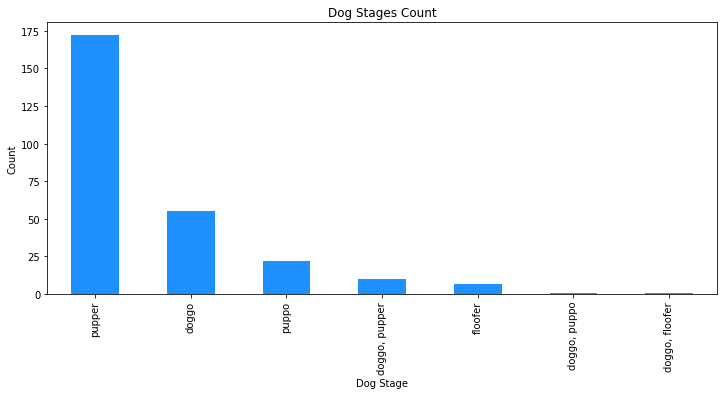

In [59]:
dog_stages.plot(kind='bar', color = 'dodgerblue', figsize=(12,5))
plt.title('Dog Stages Count')
plt.xlabel('Dog Stage')
plt.ylabel('Count');


<strong>Relationship between favorite count and retweet count</strong>

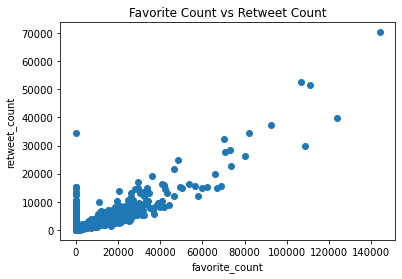

In [60]:
plt.scatter(x='favorite_count', y='retweet_count', data=data)
plt.title('Favorite Count vs Retweet Count')
plt.xlabel('favorite_count')
plt.ylabel('retweet_count');

The scatter plot shows a positive correlation between favorite count and retweet count.

<strong>Twitter source people use</strong>

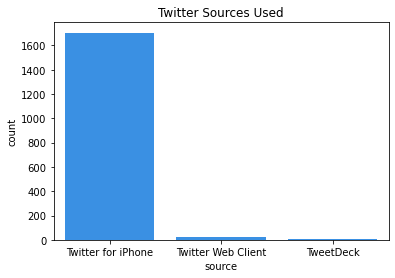

In [61]:
sns.countplot(x ='source', 
              data = data,
              color = 'dodgerblue',
              order = data.source.value_counts().index).set(title='Twitter Sources Used');

Twitter for iPhone is mostly used, we can normalize the data to get percentages

In [62]:
data.source.value_counts(normalize=True)

Twitter for iPhone    0.982143
Twitter Web Client    0.013249
TweetDeck             0.004608
Name: source, dtype: float64

According to the above output, is mostly used and leads by 98%

In [63]:
# Proportion of dog stages
data.dog_stage.value_counts(normalize=True)


pupper            0.641791
doggo             0.205224
puppo             0.082090
doggo, pupper     0.037313
floofer           0.026119
doggo, puppo      0.003731
doggo, floofer    0.003731
Name: dog_stage, dtype: float64

#### <strong>Insights</strong>
<ul>
    <li>High positive correlation between fvorite count and retweet count menas that people are more likely to retweet tweets that they find favorite</li>
    <li>Most tweets are from twitter for iPhone (about 98%)</li>
    <li>The most popular dog stage is pupper at about 64%</li>
</ul>